<a href="https://colab.research.google.com/github/drleeeee/drleee/blob/main/teachable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pwd

/content


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
cd /gdrive/

/gdrive


In [6]:
!ls /gdrive/MyDrive/

'자료구조 (1).gslides'	   '자료구조 발표.gslides'
'6월 이후 계획표 (1).hwp'   기계학습.gslides
'6월 이후 계획표.hwp'	    GW04-11A.pdf
 AI			   'How to get started with Drive.pdf'
 aimages		   '퍼셉트론, XOR 문제, 다층 퍼셉트론 (1).gslides'
'Colab Notebooks'	   '퍼셉트론, XOR 문제, 다층 퍼셉트론 (최종본).gslides'
 converted_keras.zip


In [7]:
!ls /gdrive/MyDrive/AI/

converted_keras.zip  keras_model.h5  labels.txt  test_photo.png


[[0.07495274 0.9065355  0.01851179]]
마스크 90.65%


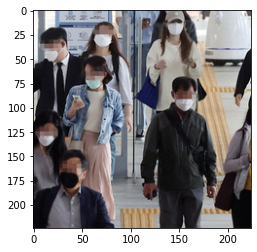

In [35]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt


# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('/gdrive/MyDrive/AI/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('../gdrive/MyDrive/AI/test_photo1.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
#image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
# data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

f=open('../gdrive/MyDrive/AI/labels.txt')
labels=[]
lines = f.readlines()
for line in lines:
  line = line.strip()
  label = line.split()[1]
  labels.append(label)
f.close()

label = labels[prediction[0].argmax()]
confidence = prediction[0][prediction[0].argmax()]
print('{} {:.2f}%'.format(label, confidence * 100))
# print(data)
plt.imshow(image)
plt.show()